In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVR

In [2]:
os.listdir()

['.ipynb_checkpoints', 'CAR DETAILS FROM CAR DEKHO.csv', 'Untitled.ipynb']

In [3]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.shape

(4340, 8)

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [11]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [14]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [16]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [17]:
df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [18]:
df.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [26]:
df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

### Encoding Categorical Data

In [20]:
df.replace({'fuel' : {'Petrol':0 , 'Diesel':1 , 'CNG':2 , 'LPG':3, 'Electric' : 4}} , inplace = True)

In [21]:
df.fuel.head()

0    0
1    0
2    1
3    0
4    1
Name: fuel, dtype: int64

In [23]:
df.replace({'owner':{'First Owner' : 0 , 'Second Owner' :1 , 'Third Owner' : 2 , 'Fourth & Above Owner' : 3 ,
                     'Test Drive Car':4}} , inplace=True)

In [24]:
df.replace({'transmission' : {'Manual':0 , 'Automatic':1 }} , inplace = True)

In [27]:
df.replace({'seller_type' : {'Individual':0 , 'Dealer':1 , 'Trustmark Dealer':2 }} , inplace = True)

In [28]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


### Splitting data 

In [31]:
x = df.drop(['selling_price','name'] , axis = 1)

In [32]:
x.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1


In [33]:
y = df.selling_price

In [37]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [38]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size= 0.2 , random_state= 2)

### Model Training

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train,y_train)

LinearRegression()

In [49]:
model.score(X_train,y_train)

0.4283228894762535

In [50]:
model.score(X_test,y_test)

0.4918005460679499

In [51]:
tr_data_pred = model.predict(X_train)

In [52]:
error = metrics.r2_score(y_train , tr_data_pred)

In [53]:
error

0.4283228894762535

In [75]:
model2 = Lasso(alpha = 0.1 , max_iter=10000)

In [76]:
model2.fit(X_train , y_train)

Lasso(alpha=0.1, max_iter=10000)

In [77]:
model2.score(X_test,y_test)

0.4918005168891757

In [78]:
model2.score(X_train,y_train)

0.4283228894757237

### Visualization

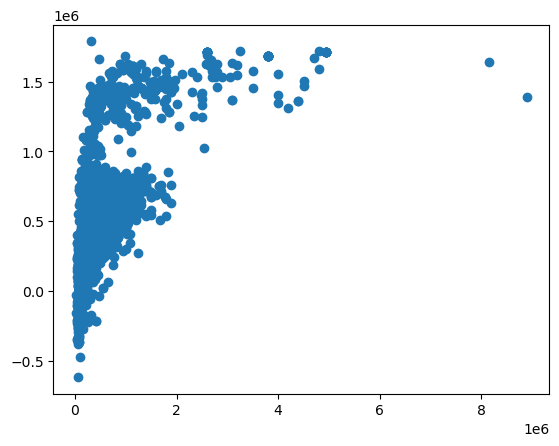

In [87]:
plt.scatter(y_train , tr_data_pred )
